In [1]:
from utils import *
import numpy as np

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

9060
9120
9180


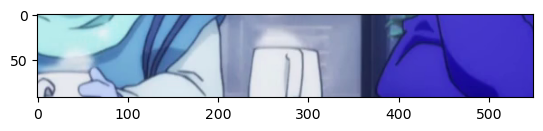

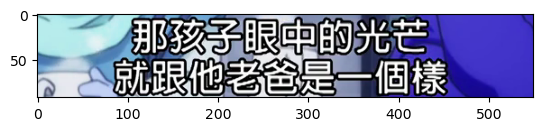

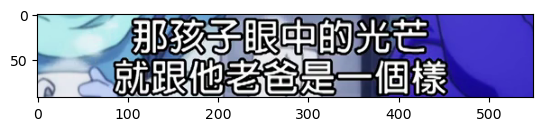

In [2]:
for frame_n in np.arange(9060, 9210, 60):
    frame_n = int(frame_n)
    print(frame_n)
    ret, frame = get_frame_n(cap, frame_n)
    _ = plt.figure()
    _ = plt.imshow(frame)


'那孩子眼中的光芒\n就跟他老爸是一个样'

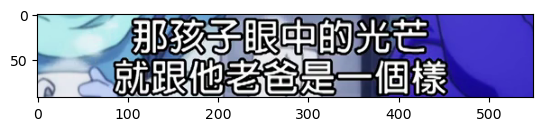

In [6]:
ret, frame = get_frame_n(cap, 9180)
plt.imshow(frame)
line_to_text(frame)

'这样很棒啊'

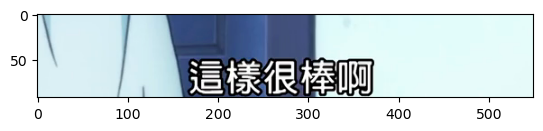

In [7]:
ret, frame = get_frame_n(cap, 10000)
plt.imshow(frame)
line_to_text(frame)

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

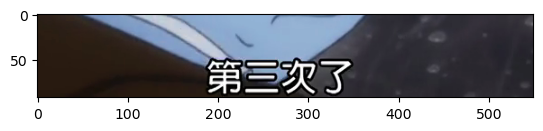

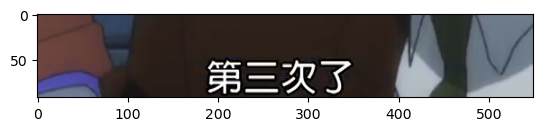

In [20]:
n = 30300

ret, frame = get_frame_n(cap, n)
plt.figure()
plt.imshow(frame)

ret, frame2 = get_frame_n(cap, n+30)
plt.figure()
plt.imshow(frame)

''

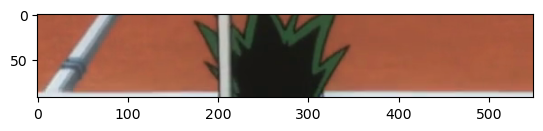

In [12]:
ret, frame = get_frame_n(cap, 14180)
plt.imshow(frame)
line_to_text(frame)

In [13]:
cap.get(cv.CAP_PROP_FPS)

29.97002997002997

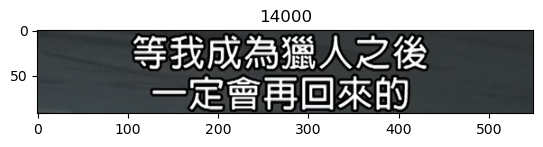

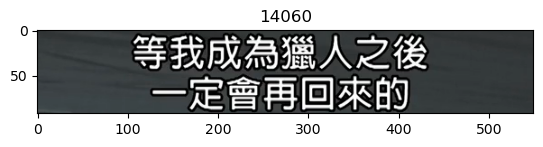

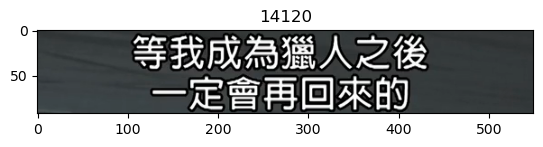

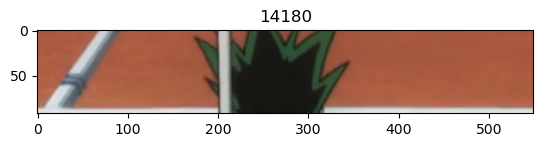

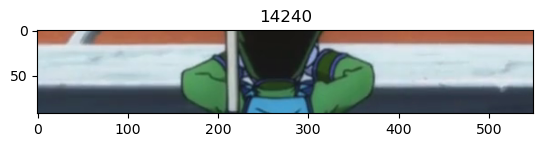

In [11]:
n = 14000

for frame_n in np.arange(n, n + 300, 60):
    frame_n = int(frame_n)
    # print(frame_n)
    ret, frame = get_frame_n(cap, frame_n)
    _ = plt.figure()
    _ = plt.imshow(frame)
    _ = plt.title(frame_n)


In [28]:
ret, frame = get_frame_n(cap, 10000)

top_line, bot_line = process_frame(frame)
top_line, bot_line

Bottom=0, top=44, base=0, x=0

Total count=0
Min=0.00 Really=0
Lower quartile=0.00
Median=0.00, ile(0.5)=0.00
Upper quartile=0.00
Max=0.00 Really=0
Range=1
Mean= 0.00
SD= 0.00


('', '')

Bottom=0, top=44, base=0, x=0

Total count=0
Min=0.00 Really=0
Lower quartile=0.00
Median=0.00, ile(0.5)=0.00
Upper quartile=0.00
Max=0.00 Really=0
Range=1
Mean= 0.00
SD= 0.00


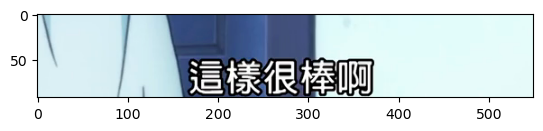

In [17]:
plt.imshow(frame)

frame = frame[3:-1, :]  # is now 88 Y 550 X

# Divide into top and bottom
top = frame[:44, :]
bottom = frame[44:, :]

# Process top and bottom
top_line = line_to_text(top)
bottom_line = line_to_text(bottom)


In [19]:
line_img = bottom
# convert to grayscale
line_img_gray = cv.cvtColor(line_img, cv.COLOR_BGR2GRAY)

# get high pass filter. This is a better version of edge detection?
size = 8
if not size%2:
    size +=1


kernel = np.ones((size,size),np.float32)/(size*size)
filtered= cv.filter2D(line_img_gray,-1,kernel)
filtered = line_img_gray.astype('float32') - filtered.astype('float32')
filtered = filtered + 127*np.ones(line_img_gray.shape, np.uint8)

# do thresholding to get just the "bright" stuff
HIGHPASS_THRESH = 180
BRIGHT_THRESH = 240

white = line_img_gray > BRIGHT_THRESH
white_hp = filtered > HIGHPASS_THRESH

# Take logical and.
out = white & white_hp

# Actually instead of taking logical and, rather take any pixel which is 1 in both, or has a neibbor
# which is 1 in 

# Do growing
out = grow_thin_binary(out)

# Do OCR
ocr = ocr_frame(out)

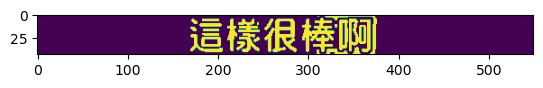

In [21]:
plt.imshow(out)

In [25]:
line_to_text(bottom)

''

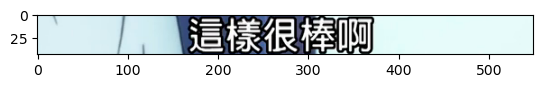

In [24]:
plt.imshow(bottom)

In [6]:
import easyocr
reader = easyocr.Reader(['ch_tra'])
result = reader.readtext('temp.png')

In [7]:
result

[([[98, 0], [438, 0], [438, 50], [98, 50]], '那孩子眼中的光芒', 0.7328679578890959),
 ([[79, 39], [461, 39], [461, 92], [79, 92]], '就跟他老爸是一個樣', 0.8681035693294669)]

In [9]:
result[0][1]

'那孩子眼中的光芒'

<Figure size 640x480 with 0 Axes>

Text(0.5, 1.0, 'white')

<Figure size 640x480 with 0 Axes>

Text(0.5, 1.0, 'white_hp')

<Figure size 640x480 with 0 Axes>

Text(0.5, 1.0, 'logical and')

<Figure size 640x480 with 0 Axes>

Text(0.5, 1.0, 'grown')

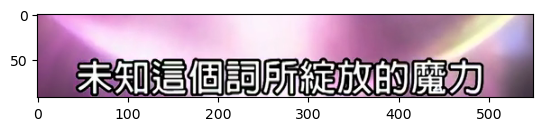

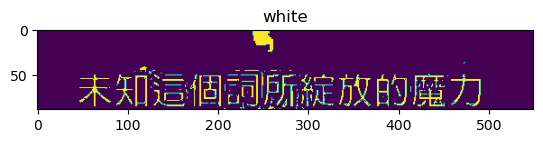

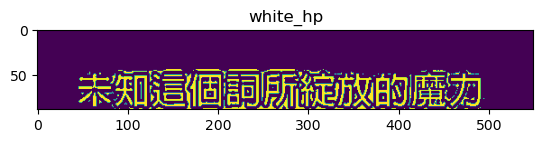

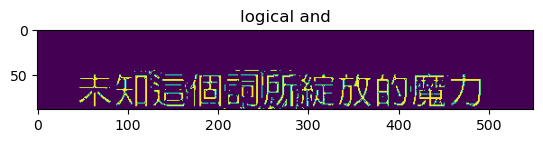

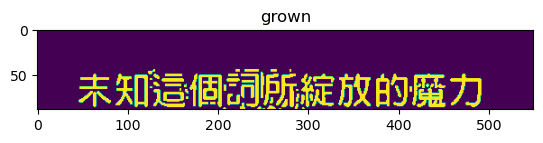

In [31]:
ret, frame = get_frame_n(cap, 3060)
plt.imshow(frame)

# Get exact part of frame that could have subtitles
frame = frame[3:-1, :]  # is now 88 Y 550 X

# convert to grayscale
frame_gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)

# get high pass filter. This is a better version of edge detection?
size = 8
if not size%2:
    size +=1

img = frame_gray
kernel = np.ones((size,size),np.float32)/(size*size)
filtered= cv.filter2D(img,-1,kernel)
filtered = img.astype('float32') - filtered.astype('float32')
filtered = filtered + 127*np.ones(img.shape, np.uint8)

# do thresholding to get just the "bright" stuff
HIGHPASS_THRESH = 180
BRIGHT_THRESH = 245

white = frame_gray > BRIGHT_THRESH
white_hp = filtered > HIGHPASS_THRESH

plt.figure()
plt.imshow(white)
plt.title('white')

plt.figure()
plt.imshow(white_hp)
plt.title('white_hp')

# Take logical and of both
out = white & white_hp
plt.figure()
plt.imshow(out)
plt.title('logical and')

# Do growing
out = grow_thin_binary(out)

plt.figure()
plt.imshow(out)
plt.title('grown')

<Figure size 1500x1500 with 0 Axes>

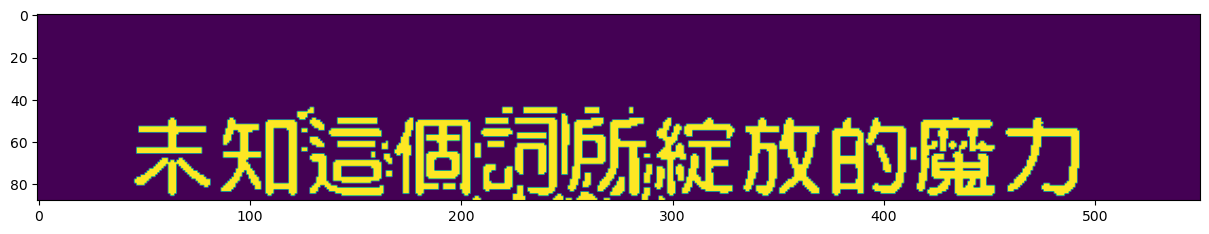

In [34]:
plt.figure(figsize=(15,15))
plt.imshow(out)

In [35]:
ocr_frame(out)

Estimating resolution as 461


'未知这个词所绽放的魔力\n'

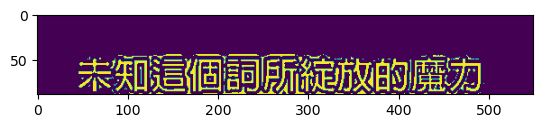

In [29]:
plt.imshow(white_hp)

In [19]:
!tesseract -l chi_tra -psm 7 ./temp.png -

�)b����A�ameter not found: j�!�]���ǂ�A��\P��u%�+Am����I}R5�PAE�T��6�4�z.�[ATPKP��HPKPW���&�MP��I}RPK4N�C
A�פ�e��P*u)4M}%�&�/��ڤ~K�R�W����kR�V�6��\�__I�W�;E!.Յx��I�sB�"��)B%�&�H�&�jԍPA=��guS]�C݊Gꛤ>/�����P�!6�BLu%��C(Q�E��Nb����R�E��@�+M]����W���D��X��)�J-�B������ؔP�D
jarning: Parameter not found: �N\�!N*�M,��]]����P"h<S��N�����{č�"�&�)hPgA�%�)�!���WJ�)v���:u/��A�Z�Z��5D��v���5u%�)hPgA�%�)���&�RA�Z�B���O
A]�Cu�&��I�Ƶ5�I���R��.�!�+q�A�����K5�Pwb(b�G�F݊/��Z�Z���T����{��J\jPgA�b(q��j���$.T\���B���*�%�%�ME<Qo�z��vA
u!*�)n�&�"�)�)��K]not found: j������+�[�����R��]
jarning: Parameter not found: A�:
j�u)����.�&ATPB5t found: j�&�P'AMq��@PA��
Acנ�ing: Parameter not found: *.UP��614v��EP��"�����kP��"J��FP���C�DP�ؕ�������.�%������[EPSPC(A
1�C}@�-�"�)�!����PqR1�*(b�kAb�[1T(�z"�%�������gj11T�~��������
read_params_file: Can't open -
Error, cannot read input file -psm: No such file or directory
Error during pro

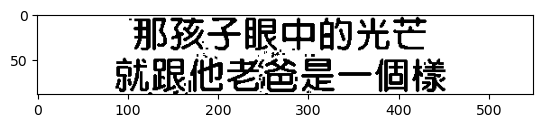

In [17]:
# load image temp.png
image = cv.imread('./temp.png')
plt.imshow(image)

3060
3120
3180


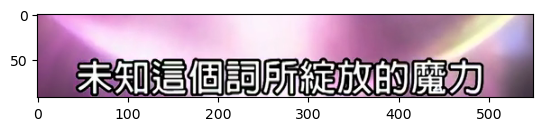

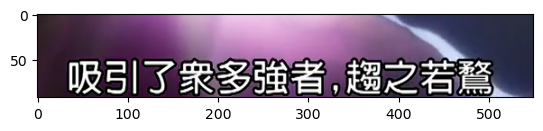

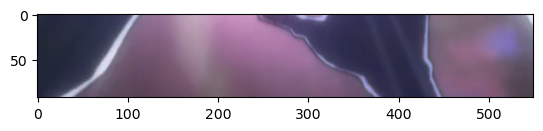

In [6]:
for frame_n in np.arange(3060, 3210, 60):
    frame_n = int(frame_n)
    print(frame_n)
    ret, frame = get_frame_n(cap, frame_n)
    _ = plt.figure()
    _ = plt.imshow(frame)


<Figure size 1500x1500 with 0 Axes>

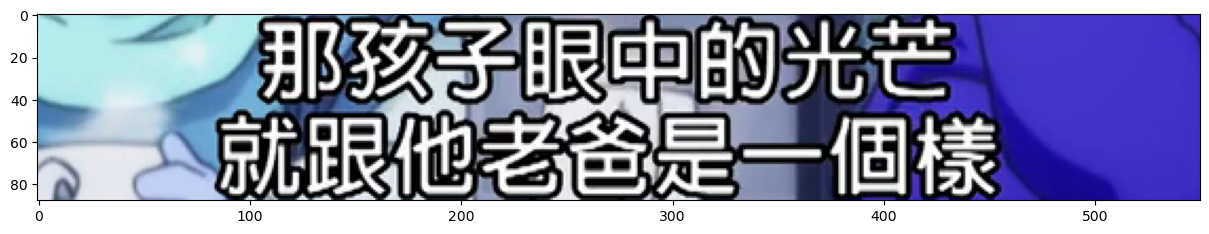

In [4]:
ret, frame = get_frame_n(cap, 9150)
plt.figure(figsize=(15,15))
plt.imshow(frame[3:-1, :])

In [5]:
frame[3:-1, :].shape

(88, 550, 3)

<Figure size 1500x1500 with 0 Axes>

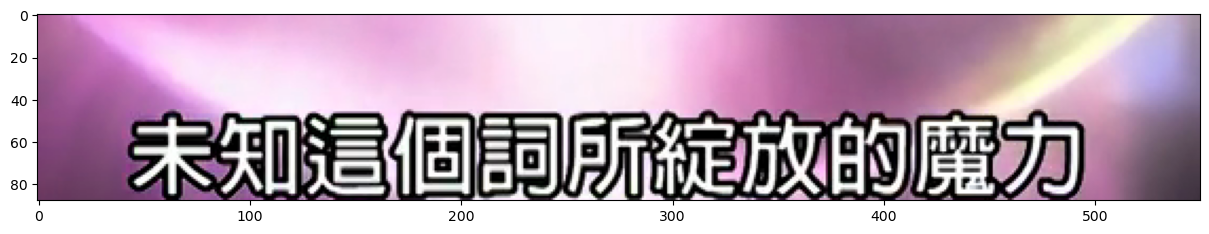

In [6]:
ret, frame = get_frame_n(cap, 3060)
plt.figure(figsize=(15,15))
plt.imshow(frame[3:-1, :])

<Figure size 1500x1500 with 0 Axes>

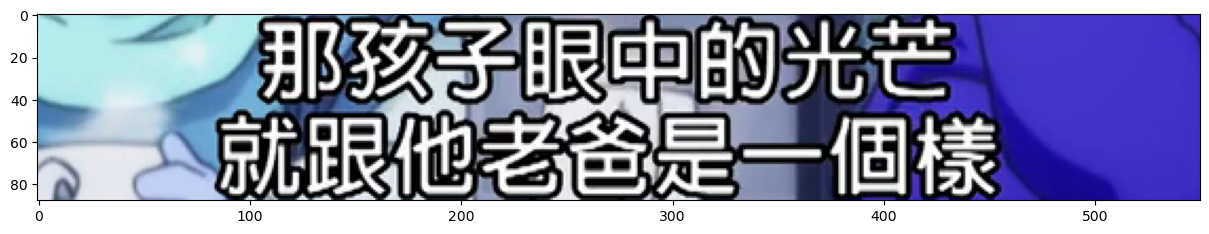

In [7]:
ret, frame = get_frame_n(cap, 9150)
plt.figure(figsize=(15,15))
plt.imshow(frame[3:-1, :])

<Figure size 1000x1000 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

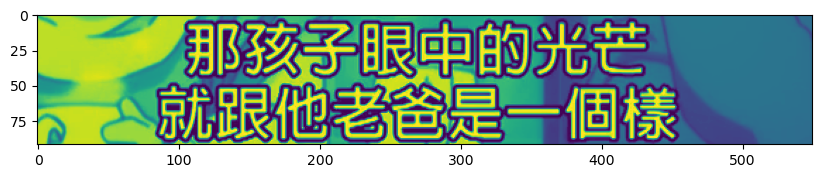

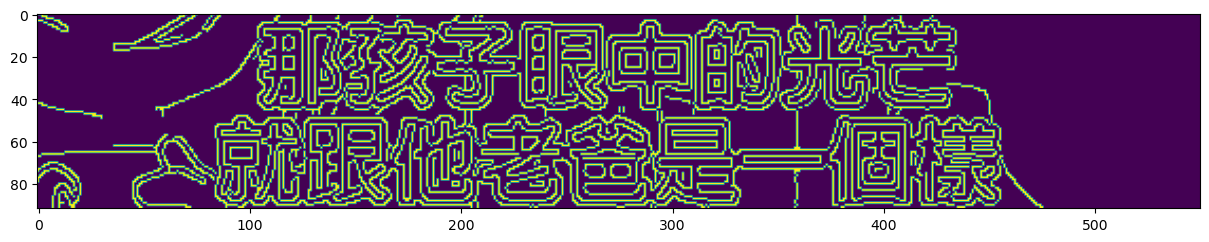

In [8]:
frame_gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
plt.figure(figsize=(10,10))
plt.imshow(frame_gray)

canny = cv.Canny(frame_gray, 100, 250)
plt.figure(figsize=(15,15))
plt.imshow(canny)

<Figure size 1500x1500 with 0 Axes>

True

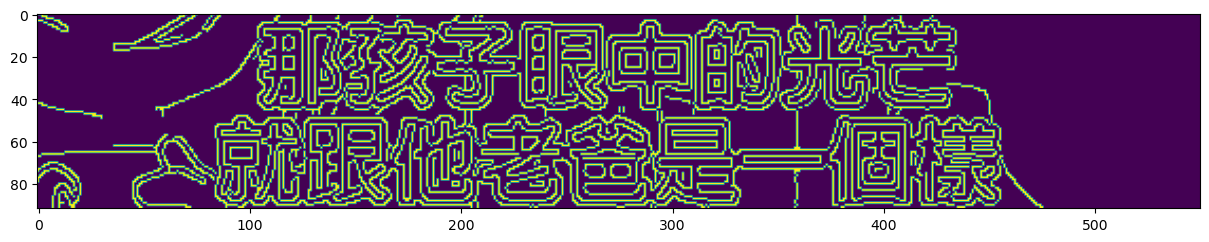

In [9]:
canny_binary = (canny == 255).astype(np.uint8)
plt.figure(figsize=(15,15))
plt.imshow(canny_binary)
cv.imwrite('temp.png', canny_binary*255)

In [10]:
import opencc
ocr_frame(255 - canny_binary*255)

Estimating resolution as 438


''

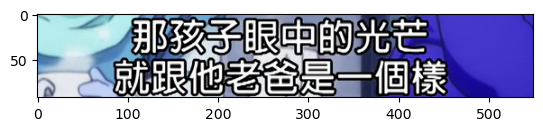

In [11]:
plt.imshow(frame)

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

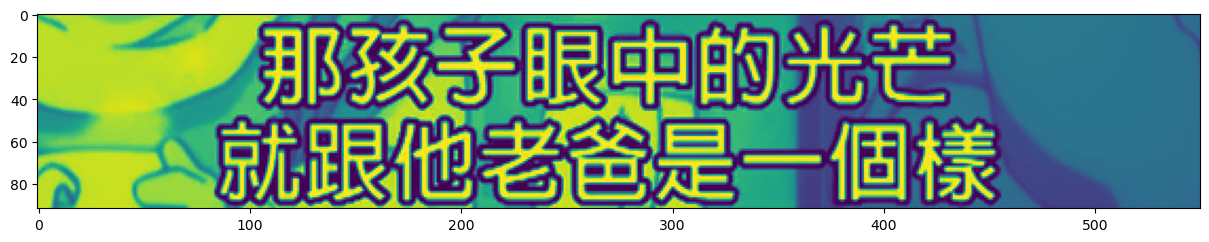

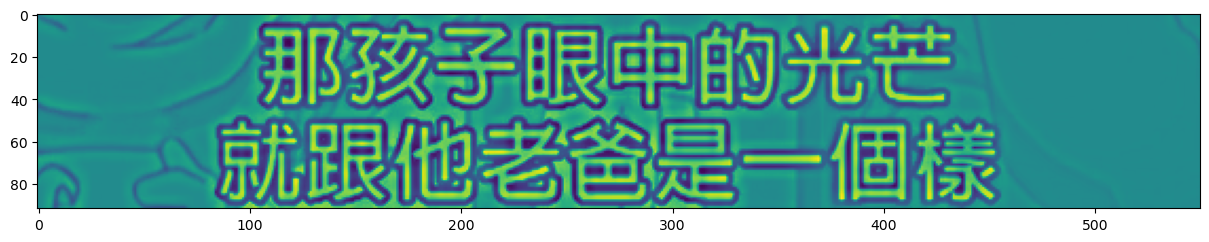

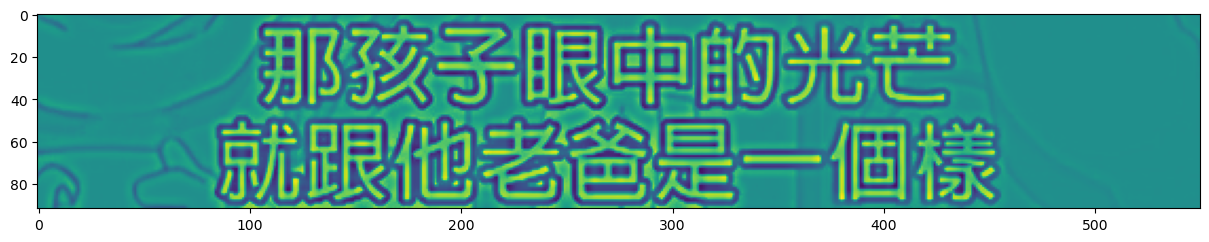

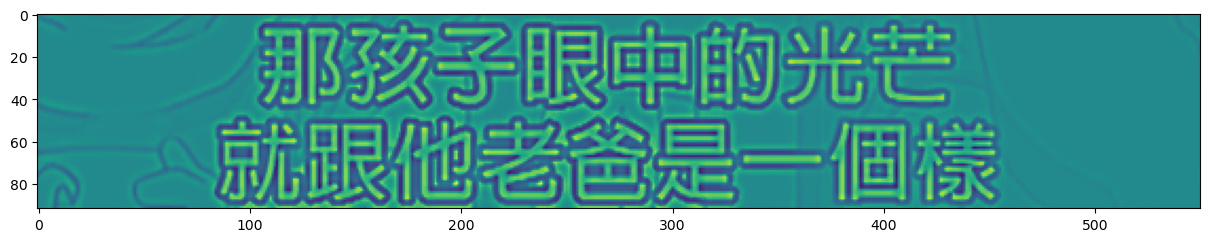

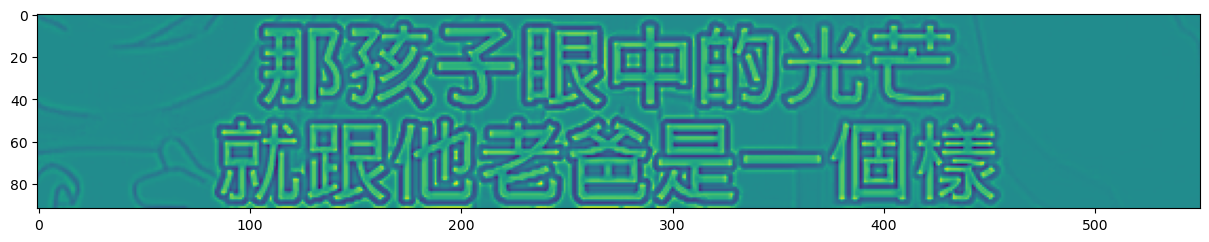

In [12]:
img = frame_gray

plt.figure(figsize=(15,15))
plt.imshow(frame_gray)

size =10
if not size%2:
    size +=1
kernel = np.ones((size,size),np.float32)/(size*size)
filtered= cv.filter2D(img,-1,kernel)
filtered = img.astype('float32') - filtered.astype('float32')
filtered = filtered + 127*np.ones(img.shape, np.uint8)

plt.figure(figsize=(15,15))
plt.imshow(filtered)


size = 8
if not size%2:
    size +=1
kernel = np.ones((size,size),np.float32)/(size*size)
filtered= cv.filter2D(img,-1,kernel)
filtered = img.astype('float32') - filtered.astype('float32')
filtered = filtered + 127*np.ones(img.shape, np.uint8)

plt.figure(figsize=(15,15))
plt.imshow(filtered)

size = 6
if not size%2:
    size +=1
kernel = np.ones((size,size),np.float32)/(size*size)
filtered= cv.filter2D(img,-1,kernel)
filtered = img.astype('float32') - filtered.astype('float32')
filtered = filtered + 127*np.ones(img.shape, np.uint8)

plt.figure(figsize=(15,15))
plt.imshow(filtered)

size = 4
if not size%2:
    size +=1
kernel = np.ones((size,size),np.float32)/(size*size)
filtered= cv.filter2D(img,-1,kernel)
filtered = img.astype('float32') - filtered.astype('float32')
filtered = filtered + 127*np.ones(img.shape, np.uint8)

plt.figure(figsize=(15,15))
plt.imshow(filtered)


# size =4
# if not size%2:
#     size +=1
# kernel = np.ones((size,size),np.float32)/(size*size)
# filtered= cv.filter2D(img,-1,kernel)
# filtered = img.astype('float32') - filtered.astype('float32')
# filtered = filtered + 127*np.ones(img.shape, np.uint8)

# plt.figure(figsize=(15,15))
# plt.imshow(filtered)

(array([6.0000e+00, 1.0000e+02, 4.6400e+02, 7.8000e+02, 1.1940e+03,
        1.5320e+03, 1.8420e+03, 1.7080e+03, 1.2220e+03, 1.3010e+03,
        1.1200e+03, 9.3800e+02, 1.0700e+03, 1.3300e+03, 1.1962e+04,
        7.6800e+03, 2.8510e+03, 1.9890e+03, 1.4340e+03, 1.1810e+03,
        1.0210e+03, 1.0580e+03, 1.2760e+03, 1.2460e+03, 1.3440e+03,
        1.3810e+03, 9.8500e+02, 3.9700e+02, 1.6400e+02, 2.4000e+01]),
 array([-67., -54., -41., -28., -15.,  -2.,  11.,  24.,  37.,  50.,  63.,
         76.,  89., 102., 115., 128., 141., 154., 167., 180., 193., 206.,
        219., 232., 245., 258., 271., 284., 297., 310., 323.],
       dtype=float32),
 <BarContainer object of 30 artists>)

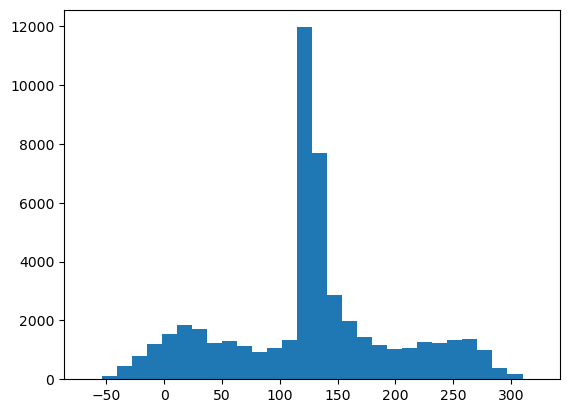

In [13]:
size = 8
if not size%2:
    size +=1
kernel = np.ones((size,size),np.float32)/(size*size)
filtered= cv.filter2D(img,-1,kernel)
filtered = img.astype('float32') - filtered.astype('float32')
filtered = filtered + 127*np.ones(img.shape, np.uint8)

# plt.figure(figsize=(15,15))
# plt.imshow(filtered)

plt.hist(filtered.flatten(), bins=30)

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

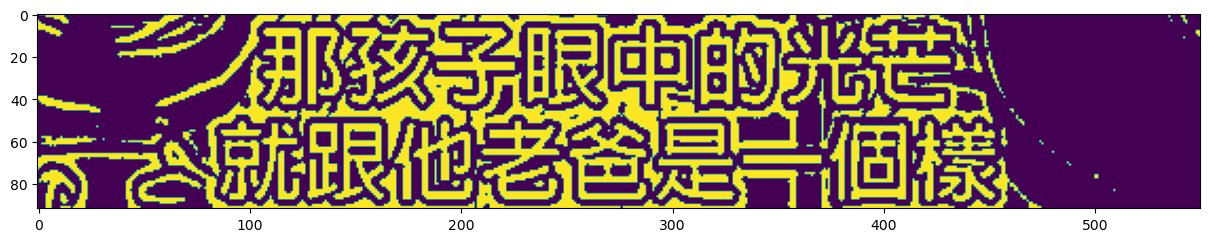

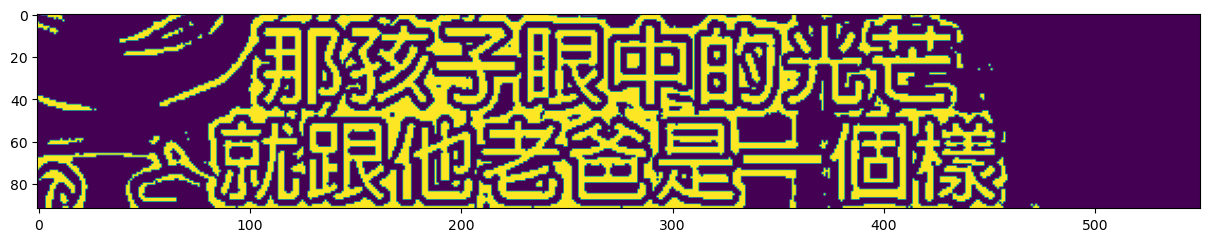

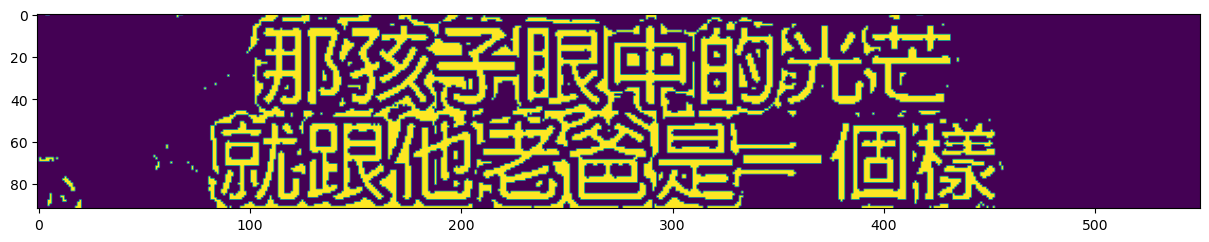

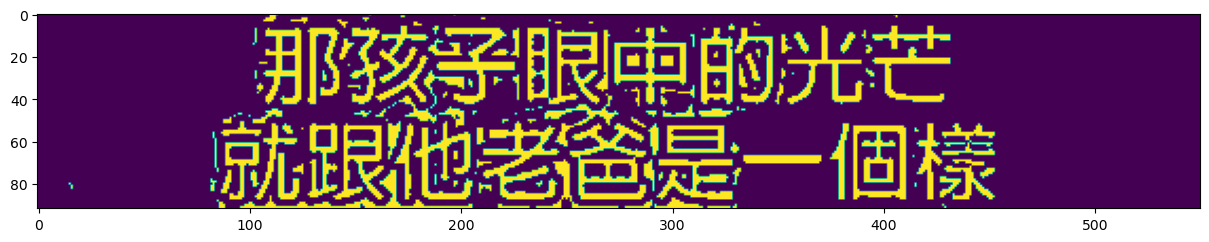

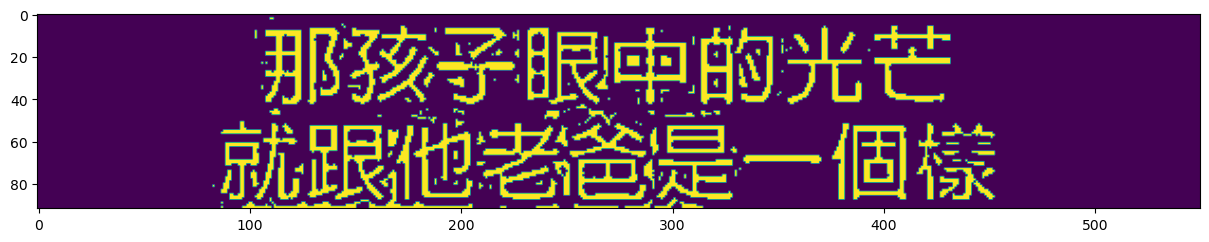

In [14]:
plt.figure(figsize=(15,15))
plt.imshow(filtered > 135)

plt.figure(figsize=(15,15))
plt.imshow(filtered > 140)

plt.figure(figsize=(15,15))
plt.imshow(filtered > 160)

plt.figure(figsize=(15,15))
plt.imshow(filtered > 180)

plt.figure(figsize=(15,15))
plt.imshow(filtered > 200)

(array([7202.,  850.,  837.,  909.,  544., 1046., 1891.,  922.,  813.,
         687., 2239., 6749.,  838.,  511.,  654.,  716., 1079., 1274.,
        1620., 1249., 1342.,  757.,  710.,  657.,  769., 1416., 2712.,
        3621., 1062., 4924.]),
 array([  0. ,   8.5,  17. ,  25.5,  34. ,  42.5,  51. ,  59.5,  68. ,
         76.5,  85. ,  93.5, 102. , 110.5, 119. , 127.5, 136. , 144.5,
        153. , 161.5, 170. , 178.5, 187. , 195.5, 204. , 212.5, 221. ,
        229.5, 238. , 246.5, 255. ]),
 <BarContainer object of 30 artists>)

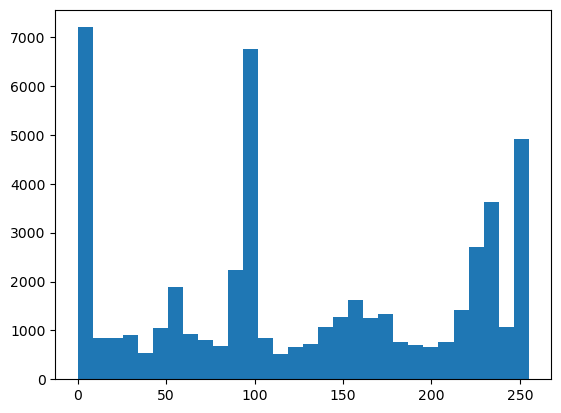

In [15]:
plt.hist(frame_gray.flatten(), bins=30)

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

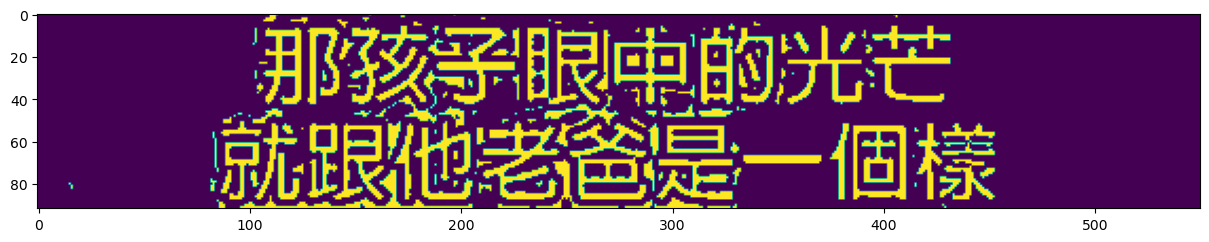

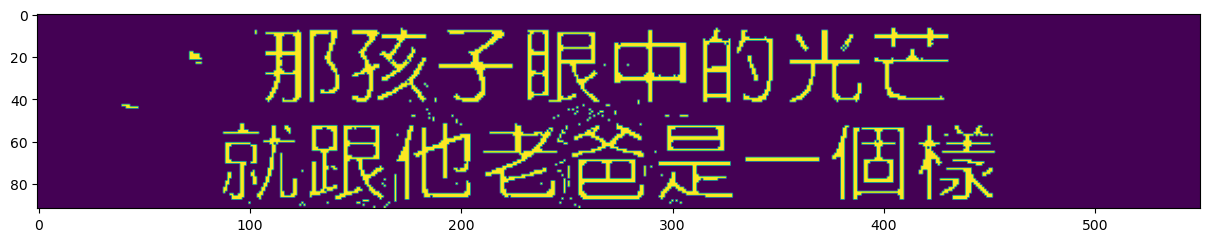

In [16]:
HP_THRESH = 180
BRIGHT_THRESH = 240

plt.figure(figsize=(15,15))
plt.imshow(filtered > HP_THRESH)

plt.figure(figsize=(15, 15))
plt.imshow(frame_gray > BRIGHT_THRESH)

<Figure size 1500x1500 with 0 Axes>

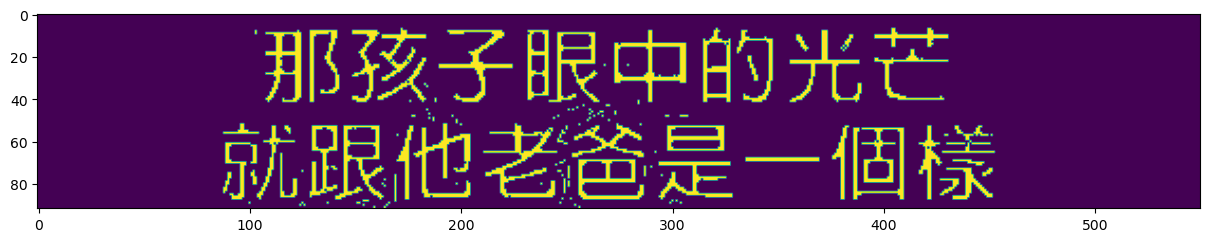

In [20]:

# temp = np.logical_or(filtered > HP_THRESH, frame_gray > BRIGHT_THRESH)
# plt.figure(figsize=(15, 15))
# plt.imshow(temp)

out = np.logical_and(filtered > HP_THRESH, frame_gray > BRIGHT_THRESH)
plt.figure(figsize=(15, 15))
plt.imshow(out)

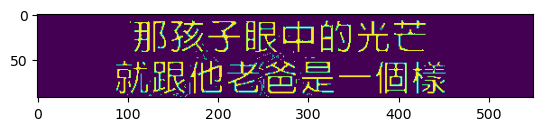

In [19]:
a, b = filtered > HP_THRESH, frame_gray > BRIGHT_THRESH
plt.imshow(a & b)

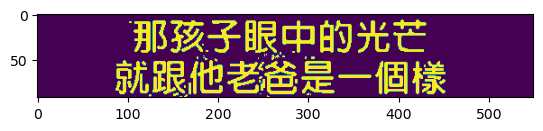

In [24]:
plt.imshow(grow_thin_binary(out))

<Figure size 1500x1500 with 0 Axes>

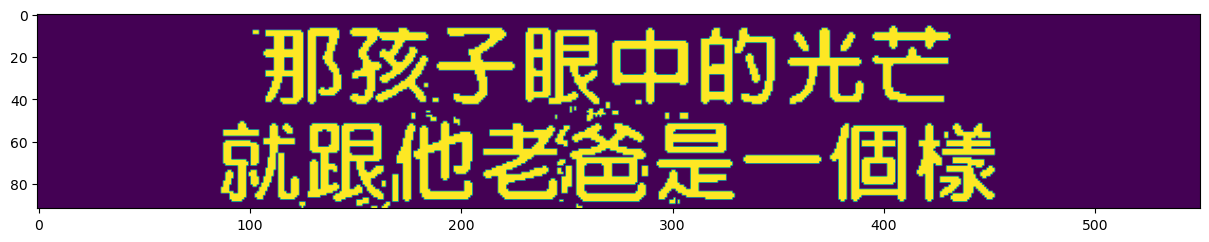

In [69]:
def grow_thin_binary(frame):
    kernel = np.ones((3,3)) / 9  # A simple averaging kernel
    convolved_image = convolve(frame.astype(np.float64), kernel)
    # plt.imshow(convolved_image)
    thresh = threshold_otsu(convolved_image)
    binary = convolved_image > thresh
    return binary.astype(np.uint8)

temp2 = grow_thin_binary(temp)
plt.figure(figsize=(15, 15))
plt.imshow(temp2)

In [70]:
def ocr_frame(frame):
    """Frame should be good looking text"""
    cv.imwrite('temp.png', frame)
    p = subprocess.Popen(['tesseract', 'temp.png', '-', '-l', 'chi_tra'], stdout=subprocess.PIPE)
    out, err = p.communicate()
    out = out.decode('utf-8')

    # traditional chinese to simplified
    cc = opencc.OpenCC('t2s')
    out_simplified = cc.convert(out)
    return out_simplified

ocr_frame(255 - temp2*255)

Estimating resolution as 460
Detected 38 diacritics


'那孩子眼中的光芯\n就跟他者爸是一个样\n'

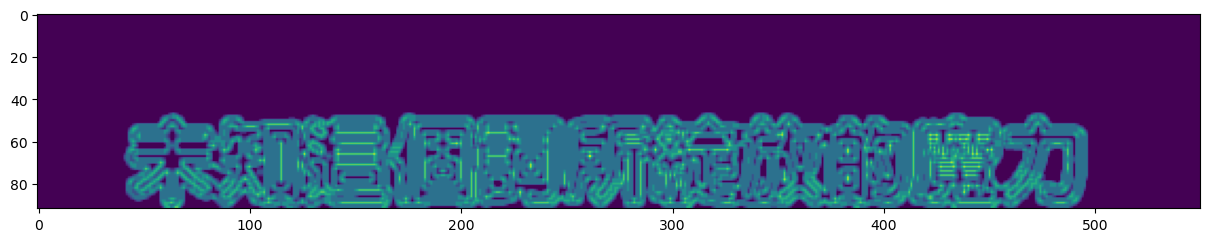

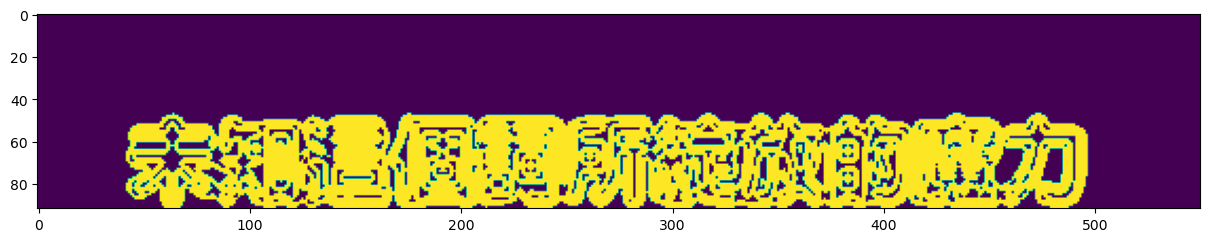

In [71]:
# let's make a mask based on canny_binary
kernel = np.ones((3,3)) / 9  # A simple averaging kernel
convolved_image = convolve(canny_binary.astype(np.float64), kernel)
plt.figure(figsize=(15,15))
plt.imshow(convolved_image)

thresh = cv.threshold(convolved_image, 0.3, 1.0, cv.THRESH_BINARY)[1]
plt.figure(figsize=(15,15))
plt.imshow(thresh)

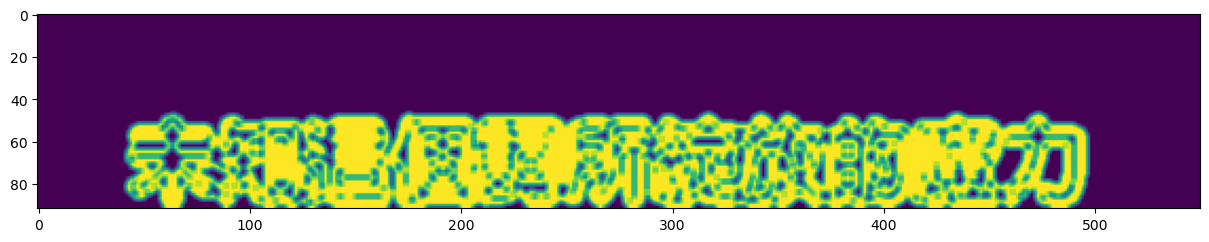

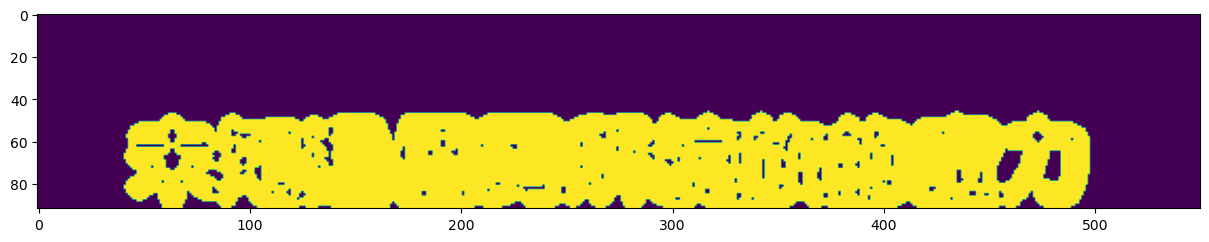

In [72]:
# let's make a mask based on canny_binary
kernel = np.ones((3,3)) / 9  # A simple averaging kernel
convolved_image = convolve(thresh.astype(np.float64), kernel)

plt.figure(figsize=(15,15))
plt.imshow(convolved_image)

thresh = cv.threshold(convolved_image, 0.3, 1.0, cv.THRESH_BINARY)[1]
plt.figure(figsize=(15,15))
plt.imshow(thresh)

(array([3.2917e+04, 1.0030e+03, 1.5710e+03, 1.0422e+04, 2.8020e+03,
        0.0000e+00, 1.2570e+03, 5.8300e+02, 4.4000e+01, 1.0000e+00]),
 array([0.        , 0.08888889, 0.17777778, 0.26666667, 0.35555556,
        0.44444444, 0.53333333, 0.62222222, 0.71111111, 0.8       ,
        0.88888889]),
 <BarContainer object of 10 artists>)

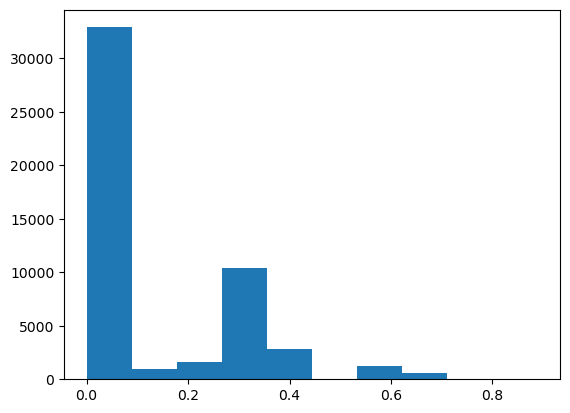

In [65]:
plt.hist(convolved_image.flatten())

In [18]:
cv.imwrite('temp.png', frame)
p = subprocess.Popen(['tesseract', 'temp.png', '-', '-l', 'chi_tra'], stdout=subprocess.PIPE)
out, err = p.communicate()
out = out.decode('utf-8')

Estimating resolution as 455


In [19]:
out

'未知党個詞甩總店的魔史請\n\n'

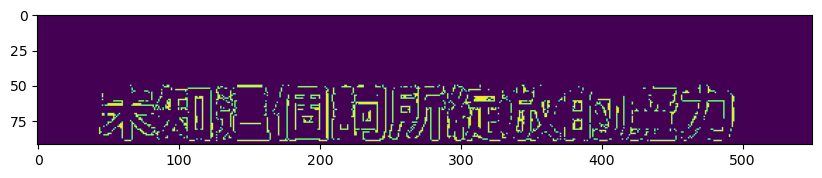

In [14]:
black = frame.sum(axis=2) == 0
black = black.astype(np.uint8)
plt.figure(figsize=(10,10))
plt.imshow(black)

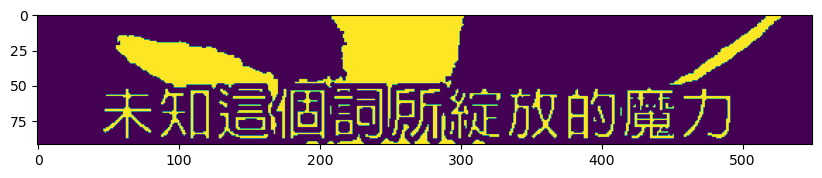

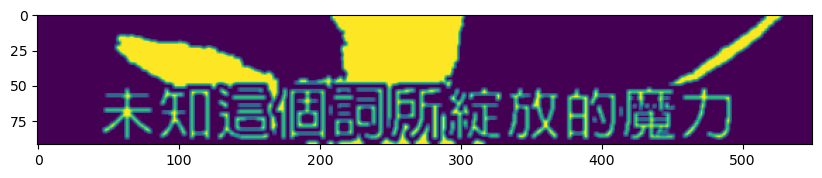

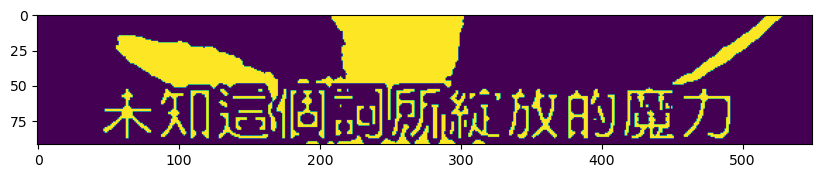

In [50]:
white = frame.sum(axis=2) >= 255*3-54

white = white.astype(np.uint8)

# This helps to remove little blobs around, and fill in some holes
blur = cv.GaussianBlur(white,(3,3),0)
thresh = cv.threshold(blur, 100, 255, cv.THRESH_BINARY)[1]
plt.figure(figsize=(10,10))
plt.imshow(blur)


# Our text is too thin because it came from the inner white that is surrounded by black.
# So pump it up a little bit. This is probably similar to the previous action
kernel = np.ones((3,3)) / 9  # A simple averaging kernel
convolved_image = convolve(blur.astype(np.float64), kernel)
blur
plt.figure(figsize=(10,10))
plt.imshow(convolved_image)
thresh = threshold_otsu(convolved_image)
binary = convolved_image > thresh

# Binary is 1 for white (text) and 0 for rest.
# We flip to have background white and text is black, and normal 0 - 255 scale
out = 255 - binary*255
plt.figure(figsize=(10,10))
plt.imshow(binary)

In [13]:
out

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]])